In [2]:
# 1. From which countries maximum budget projects are coming?
# 2. Top countries with maximum job posting?
# 3. What are the skill sets required by the different recruiters?
# 4. Top skills required?
# 5. How skills have changed with time?
%reset

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
data_raw = pd.read_csv('Clean_UpWork.csv')

In [351]:
def transformation(df):
    result = df.rename(columns={
        'Unnamed: 0': 'id',
        'Category2': 'Category',
        'Subcategory2': 'Subcategory',
        'Job.Type': 'Job_type',
        'Month_Yr': 'Month_year',
    })
    result.drop('JobID', axis=1, inplace=True)
    
    # Change nulls (nan) to empty string for easier processing.
    # It's possible that ordering is different for some postings (even though it looks like ordered).
    # I'll create cleand column as list and strings (both sorted).
    result.loc[result['Skills'].isna(), 'Skills'] = ''
    result['Skills_clean_list'] = result['Skills'].apply(lambda x: x.split(',')).copy()
    result['Skills_clean_list'].apply(lambda x: x.sort())
    result['Skills_clean'] = result['Skills_clean_list'].apply(lambda x: ','.join(x))

    return result

data = transformation(data_raw)
data.head(6)

,id,Title,Snippet,Category,Subcategory,Skills,Job_type,Budget,Country,URL,Month_year,Skills_clean_list,Skills_clean
0,1,Telegram Bot Development,Looking for Expert who has good experience in ...,"Web, Mobile & Software Dev",Web Development,"node.js,python",Hourly,0.0,United States,http://www.upwork.com/jobs/~01189589ffdd85cac9,2018-04,"[node.js, python]","node.js,python"
1,2,HUGO developer,We are looking for someone to help us convert ...,"Web, Mobile & Software Dev",Web Development,"css3,html5,hugo",Hourly,0.0,Canada,http://www.upwork.com/jobs/~018a9c5f1984279979,2018-04,"[css3, html5, hugo]","css3,html5,hugo"
2,3,Professional WordPress Programmer,Will discuss the project details once you are ...,"Web, Mobile & Software Dev",Web Development,wordpress,Fixed,50.0,Philippines,http://www.upwork.com/jobs/~018af8d4b27958c0a3,2018-04,[wordpress],wordpress
3,4,Simple one page application to visualise a D3....,This project has a limited budget but may suit...,"Web, Mobile & Software Dev",Web Development,"c#,d3.js,javascript",Fixed,50.0,United Kingdom,http://www.upwork.com/jobs/~015fb1bdfdef3a7560,2018-04,"[c#, d3.js, javascript]","c#,d3.js,javascript"
4,5,Modification to Blueprint shader in UE4,"I'm working with a UE4 asset, Water Planes, av...","Web, Mobile & Software Dev",Desktop Software Development,"3ds-max,c++,unreal-development-kit,unrealscript",Hourly,0.0,NaN,http://www.upwork.com/jobs/~01dfddc43c58a49614,2018-04,"[3ds-max, c++, unreal-development-kit, unreals...","3ds-max,c++,unreal-development-kit,unrealscript"
5,6,APIGUM Publish App (RU),APIGUM.com is a free service for connecting AP...,"Web, Mobile & Software Dev",Web Development,,Fixed,30.0,United States,http://www.upwork.com/jobs/~01afcf62d61fd903c7,2018-04,[],


### From which countries maximum budget projects are coming?

In [54]:
# How many project we have?
data['id'].value_counts().shape  # 23516
data['JobID'].value_counts().shape  # 23516 --> JobID and id convey same information, JobID can be dropped
# We have 23516 of projects

(23516,)

In [71]:
# What is distribution of the budget?
print(data['Budget'].value_counts().head(10))
print('\n99 percentile: {}'.format(np.percentile(data['Budget'], 50)))

0.0       10892
100.0      1294
500.0      1014
50.0        919
200.0       821
1000.0      740
300.0       610
5.0         546
150.0       516
20.0        415
Name: Budget, dtype: int64

99 percentile: 10.0


In [84]:
# Take a look for maximum Budget projects...
data.sort_values(by='Budget', ascending=False).head(20)[['Title', 'Snippet', 'Budget']]  # Lools like real offers.

,Title,Snippet,Budget
54,Looking for a CTO for a blockchain project,We are a chinese blockchain startup in shangha...,1000000.0
3478,Cryptocurrency,I am looking for a dev to help create and erc2...,1000000.0
22590,website design 2017,preferrably someone who can manage a team of d...,1000000.0
2420,Looking to launch and ICO and need a programmer,Looking to launch an sercrity based ICO and ne...,1000000.0
2220,online food ordering complete system,I need an online food ordering system by java....,1000000.0
6668,Design and Build SharePoint Portal for Law Firm,I am looking for someone to build a SharePoint...,1000000.0
18477,"wordpress site with clean CMS, integrate custo...",Your intro or CL or comment must have a specif...,1000000.0
2787,Shipstation integration with Seller fulfilled ...,I'm looking for a developer to design an integ...,999999.0
2107,Web Design for Video Upload,I'm looking to have a website that will be a l...,999999.0
42,woo commerce store setup assistance needed,"Hi, i have a partially built wocommerce store ...",999999.0


/Users/slechwar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


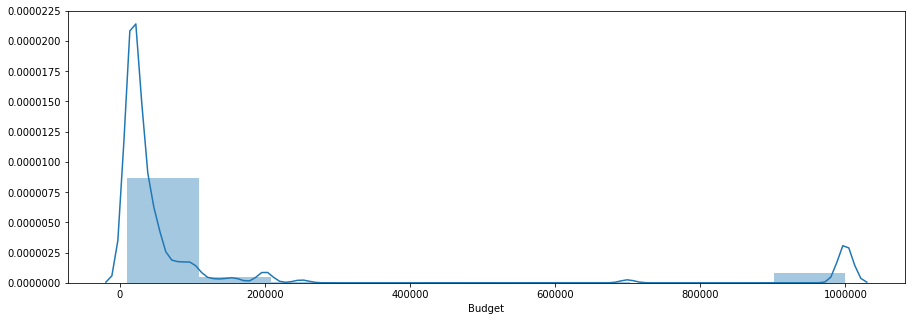

In [97]:
# Let's analyze above 10 000
plt.figure(figsize=(15,5))
sns.distplot(data.loc[data['Budget'] > 10000, 'Budget'], bins=10)
# We can easily say that looking at project above 500 000 is reasonable in this case.

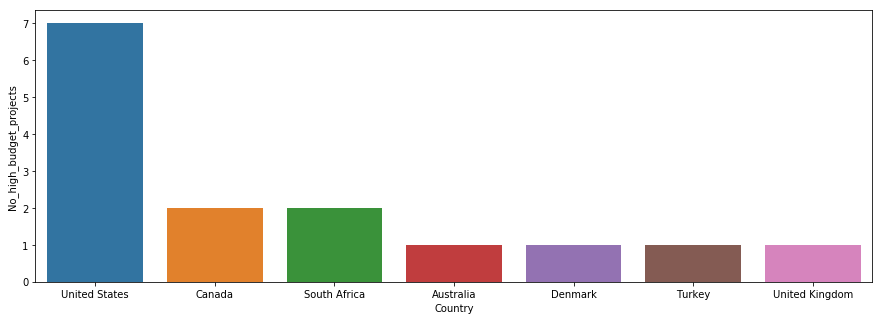

In [124]:
data_grouped_by_country = data.loc[data['Budget'] > 500000, ['Country', 'Budget']].groupby('Country').agg('count').reset_index()
data_grouped_by_country.rename(columns={'Budget': 'No_high_budget_projects'}, inplace=True)
data_grouped_by_country.sort_values(by='No_high_budget_projects', ascending=False, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(x='Country', y='No_high_budget_projects', data=data_grouped_by_country)

### Top countries with maximum job posting?

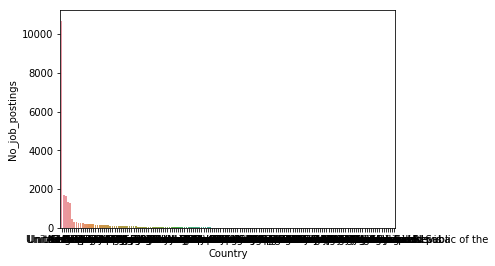

In [133]:
# How many hob postings do we have?
data['id'].shape[0]  # 23516
data_grouped_by_country_job_postings = data[['Country', 'id']].groupby('Country').agg('count').reset_index()
data_grouped_by_country_job_postings.rename(columns={'id': 'No_job_postings'}, inplace=True)
data_grouped_by_country_job_postings.sort_values(by='No_job_postings', ascending=False, inplace=True)
sns.barplot(x='Country', y='No_job_postings', data=data_grouped_by_country_job_postings)
# Not really telling much...

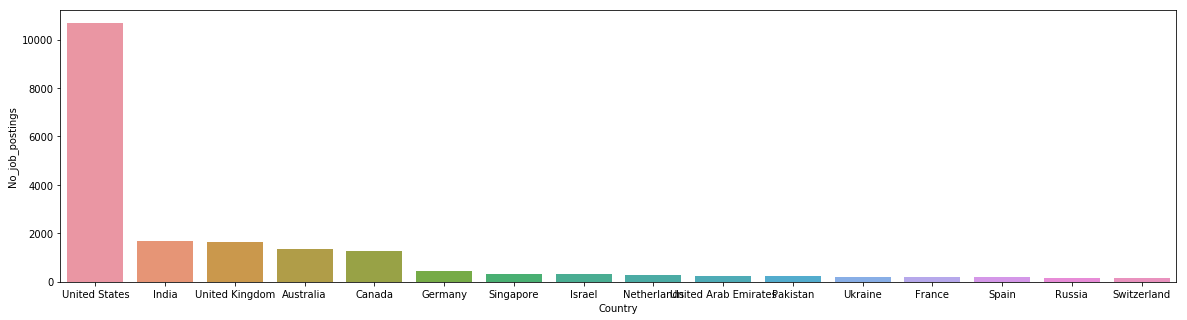

In [151]:
threshold = np.percentile(data_grouped_by_country_job_postings['No_job_postings'], 90)
for_viz = data_grouped_by_country_job_postings[data_grouped_by_country_job_postings['No_job_postings'] > threshold]
plt.figure(figsize=(20,5))
sns.barplot(x='Country', y='No_job_postings', data=for_viz)
# We can even say top Countires are only first 5 (including Canada)

### What are the skill sets required by the different recruiters?

<BarContainer object of 30 artists>

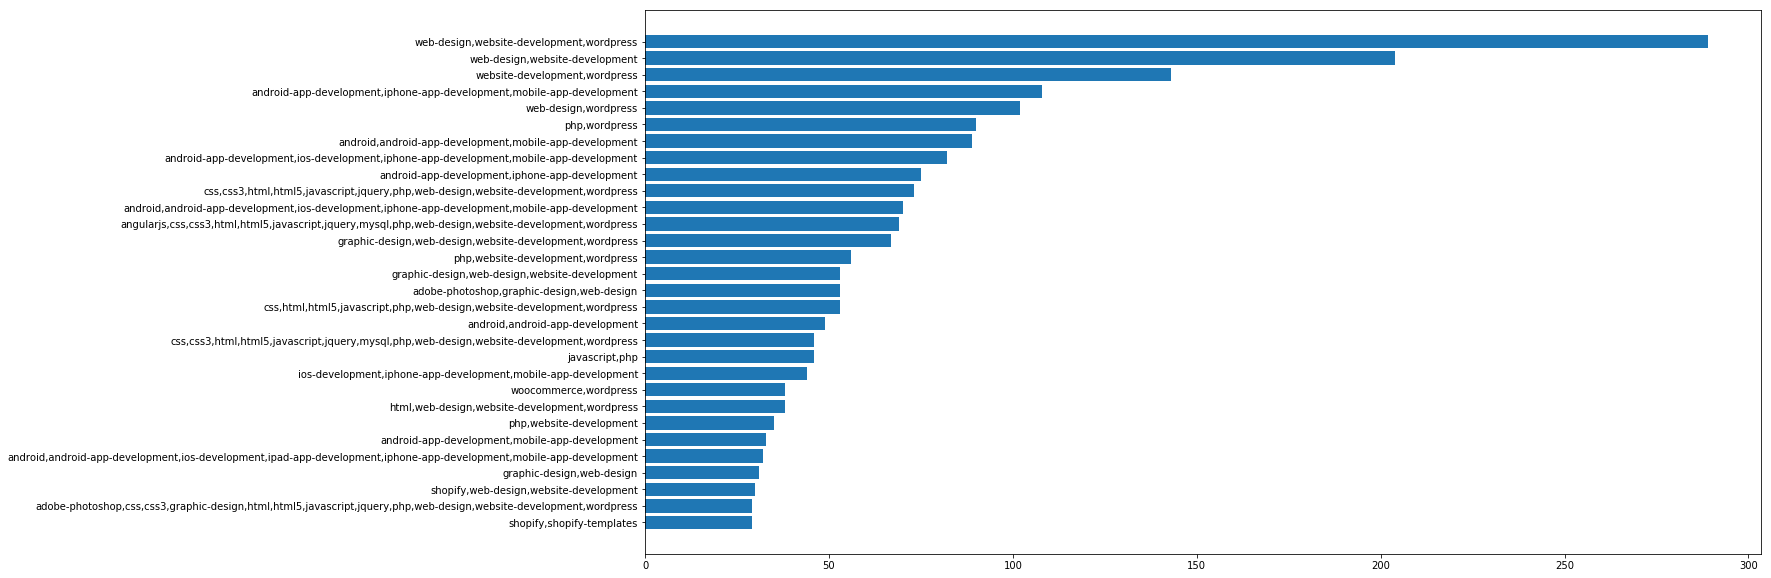

In [322]:
# This question is about skill SETS, so it should be analyzed as a set.
# Single skills should be removed.
data['Skills_clean_list_len'] = data['Skills_clean_list'].apply(lambda x: len(x))
data_only_skill_sets = data[data['Skills_clean_list_len'] > 1].copy()

# It's hard to get information about recruiter.
# For the sake of excercise I assume each one is from different recruiter.
data_only_skill_sets_grouped = data_only_skill_sets[['Skills_clean', 'id']].groupby('Skills_clean').agg('count').reset_index()
data_only_skill_sets_grouped.rename(columns={'id': 'No_sets'}, inplace=True)
data_only_skill_sets_grouped.sort_values(by='No_sets', ascending=False, inplace=True)

# Number of sets
data_only_skill_sets_grouped['No_sets'].shape[0]  # -> 9950

plt.figure(figsize=(20, 10))
# sns.barplot(x='Skills_clean', y='No_sets', data=data_only_skill_sets_grouped.head(30))
for_viz = data_only_skill_sets_grouped.head(30).sort_values(by='No_sets')
plt.barh(for_viz['Skills_clean'], for_viz['No_sets'])

### Top skills required?

<BarContainer object of 20 artists>

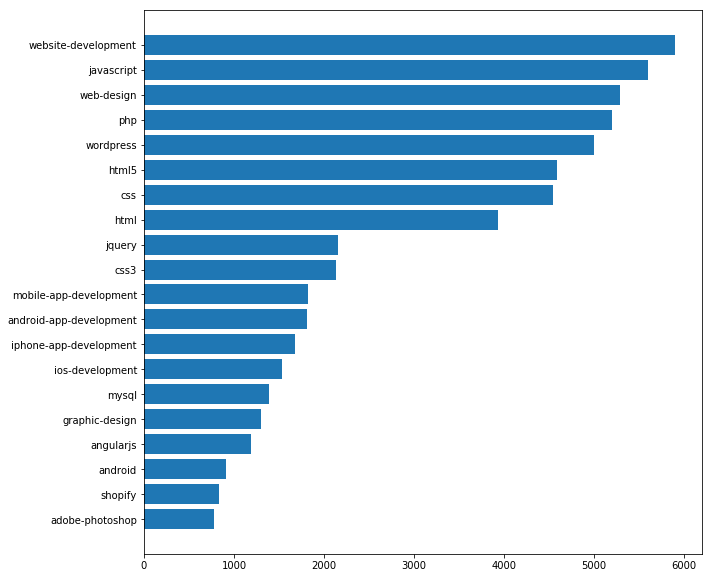

In [354]:
skills = []
for skills_list in data['Skills_clean_list']:
    for skill in [s for s in skills_list if s is not '']:
        skills.append(skill)
        
skills = pd.DataFrame({'Skills': skills})
skills = pd.DataFrame(skills['Skills'].value_counts()).reset_index()
skills.rename(columns={'index': 'Skill', 'Skills': 'No_occurences'}, inplace=True)
for_viz = skills.head(20).sort_values(by='No_occurences')
plt.figure(figsize=(10,10))
plt.barh(for_viz['Skill'], for_viz['No_occurences'])

### How skills have changed with time?

In [353]:
data['Month_year'].value_counts()  # I have only 3 periods to compare...
# Let's compare 2017 to 2018
# And not concrete values but percenges

2017-08    18571
2018-04     3516
2017-07     1429
Name: Month_year, dtype: int64

In [409]:
data['Year'] = data['Month_year'].apply(lambda x: x[:4]).copy()

In [413]:
skills = []
for row in data[['Skills_clean_list', 'Year']].itertuples():
    for skill in [s for s in row.Skills_clean_list if s != '']:
        skills.append((skill, row.Year))

skills_year = pd.DataFrame(skills)
skills_year.rename(columns={0: 'Skill', 1: 'Year'}, inplace=True)

skills_2017 = skills_year.loc[skills_year['Year'] == '2017', 'Skill']
skills_2018 = skills_year.loc[skills_year['Year'] == '2018', 'Skill']

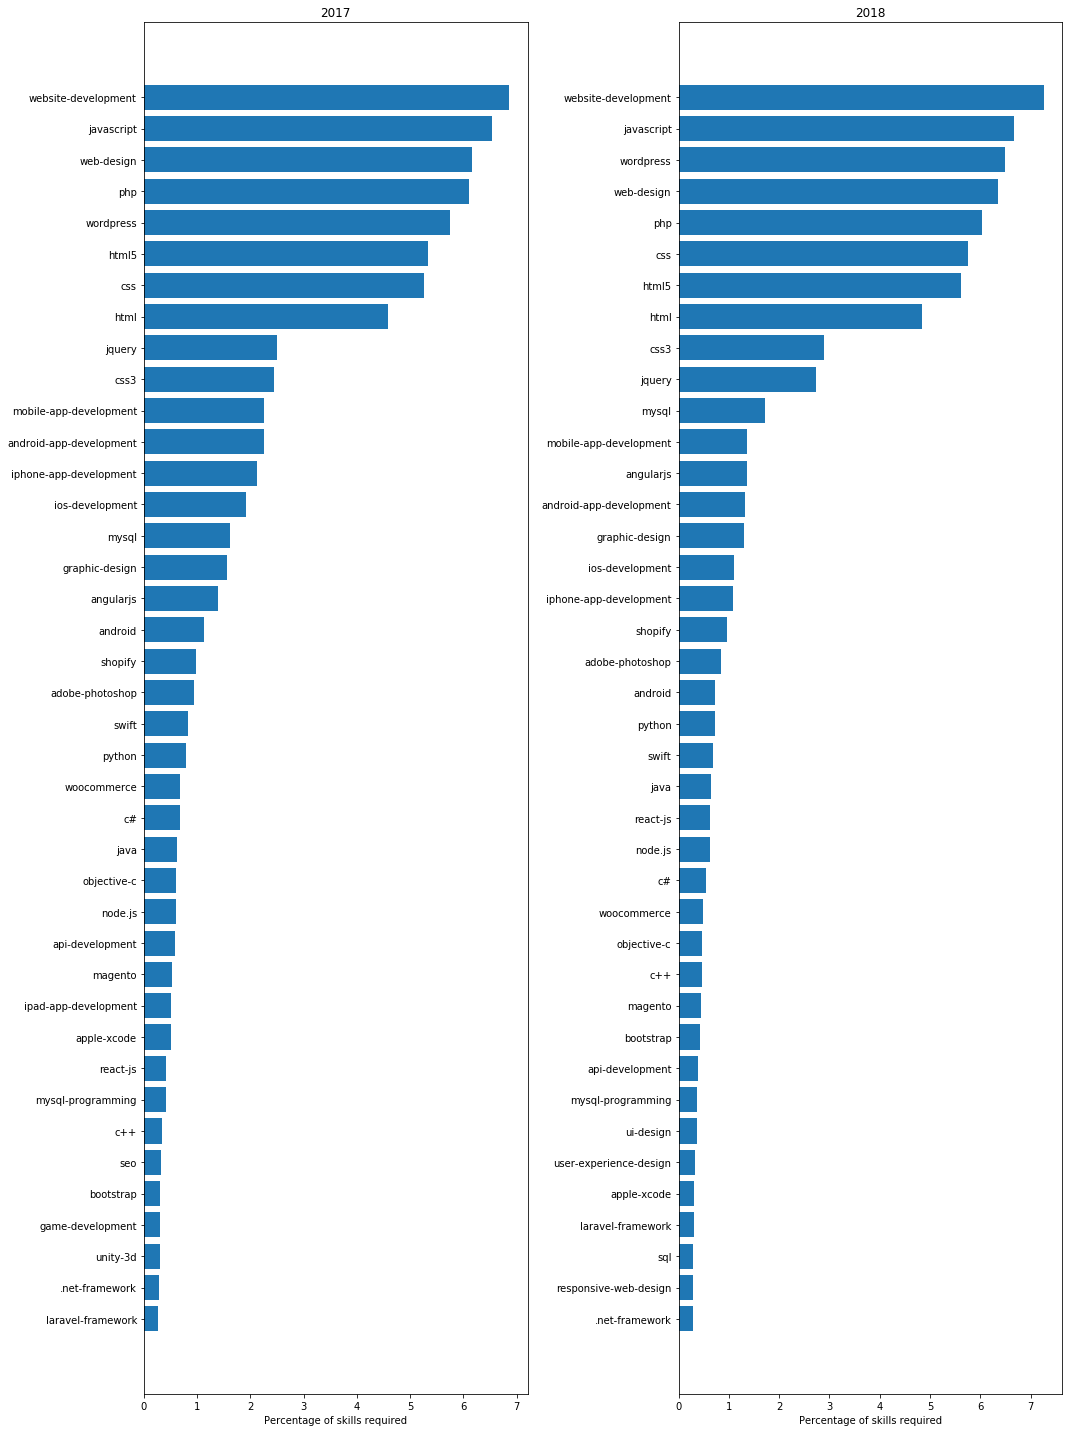

In [447]:
# What are higer percetages of skills in 2017 and 2018? (top 20)
def get_percetages(df, top):
    result = pd.DataFrame(df.value_counts() / df.shape[0] * 100).reset_index()
    result.rename(columns={'index':'Skill', 'Skill':'Percentage'}, inplace=True)
    result = result.head(top)
    result.sort_values(by='Percentage', ascending=True, inplace=True)
    return result

percentages_2017 = get_percetages(skills_2017, 40)
percentages_2018 = get_percetages(skills_2018, 40)

plt.figure(figsize=(15,20))

plt.subplot(121)
plt.barh(percentages_2017['Skill'], percentages_2017['Percentage'])
plt.title('2017')
plt.xlabel('Percentage of skills required')

plt.subplot(122)
plt.barh(percentages_2018['Skill'], percentages_2018['Percentage'])
plt.title('2018')
plt.xlabel('Percentage of skills required')

plt.tight_layout()
